In [1]:
#z5611048 Samyak Diwan regression part 
# header files and reading our data
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import stats # type: ignore
from tensorflow.keras.models import load_model # type: ignore
data = pd.read_csv('Climate_SPI.csv')

In [2]:
from sklearn.model_selection import train_test_split # type: ignore
#4(a)   
X = data.drop(columns=['year','grid_ID','SPI'])  
y = data['SPI']  

In [3]:
#4(a)
X_train, X_comb, y_train, y_comb = train_test_split(X,y,test_size = 0.3, random_state = 42) #training set is 70% & combination set is 30%
X_val, X_test, y_val, y_test = train_test_split(X_comb, y_comb, test_size=0.5, random_state=42)# validation&testing given 15% each 

In [4]:
#4(b) data pre-processing
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Applying same scaling on our validation and test set
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Converting month to numeric
data['month'] = pd.to_numeric(data['month'], errors='coerce').copy()

# Filling NaN values (for standard data pre processing just in-case )
data['month'] = data['month'].fillna(1).astype(int)


# 3.4
data['month_normalised'] = 2 * np.pi * (data['month'] - 1) / 12
data['month_cos'] = np.cos(data['month_normalised'])
data['month_sin'] = np.sin(data['month_normalised'])

# Dropping month column
data = data.drop(columns=['month'])

In [34]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense , Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.regularizers import l2 # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras import regularizers # type: ignore

# Adding early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# this is my model where i have added L2 regularization to prevent overfittin
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,), kernel_regularizer=  regularizers.l2(0.001) ),  # First hidden layer with 128 neurons
    Dropout(0.3),
    Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    Dropout(0.3),
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons
    Dropout(0.3),
    Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])  # MSE for loss fn and MAE as metric

# print(model.summary())

C:\Users\Samayak\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# 4(d) Training the neural network and monitoring the evolution of the loss values
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=64, 
                    validation_data=(X_val_scaled, y_val))


Epoch 1/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7902 - mae: 0.6937 - val_loss: 0.5646 - val_mae: 0.5824
Epoch 2/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6463 - mae: 0.6277 - val_loss: 0.5446 - val_mae: 0.5691
Epoch 3/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5997 - mae: 0.6018 - val_loss: 0.5037 - val_mae: 0.5471
Epoch 4/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5654 - mae: 0.5815 - val_loss: 0.5020 - val_mae: 0.5469
Epoch 5/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5729 - mae: 0.5899 - val_loss: 0.4987 - val_mae: 0.5450
Epoch 6/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5448 - mae: 0.5688 - val_loss: 0.5013 - val_mae: 0.5469
Epoch 7/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5496 - mae: 0.5802 - val_loss: 0.4725 - val_mae: 0.5293
Epoch 8/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5334 - mae: 0.5698 - val_loss: 0.4702 - val_mae: 0.5297
Epoch 9/40
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

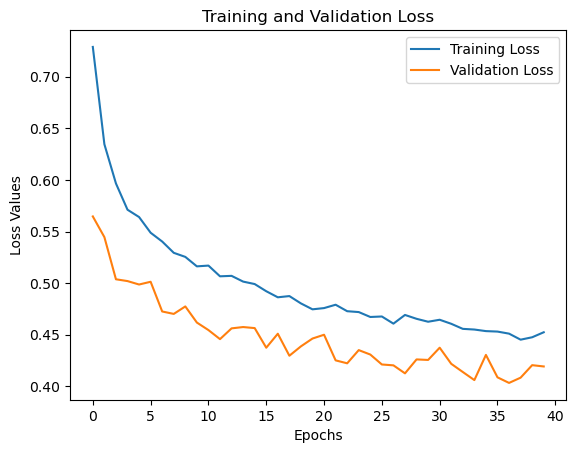

In [36]:
# 4.1 Plotting loss value (y-axis) versus the number of epochs (x-axis) for both the training and validation sets as required by assignment spec 

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



In [12]:
#4.2(g) Subsets
# Subset 1: Temperature related variables
X_sub_1 = X[['mn2t', 'mx2t', 't', 't2']]
X_train_1, X_val_1, X_test_1 = X_train[['mn2t', 'mx2t', 't', 't2']], X_val[['mn2t', 'mx2t', 't', 't2']], X_test[['mn2t', 'mx2t', 't', 't2']]

# Subset 5: Random Variables 2
X_sub_2 = X[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']]
X_train_2, X_val_2, X_test_2 = X_train[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']], X_val[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']], X_test[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']]

# Subset 6: Random Variables 1
X_sub_3 = X[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']]
X_train_3, X_val_3, X_test_3 = X_train[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']], X_val[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']], X_test[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']]




In [13]:
# Apply scaling to training and validation sets for each subset
scaler_1 = StandardScaler()
X_train_1_scaled = scaler_1.fit_transform(X_train_1)
X_val_1_scaled = scaler_1.transform(X_val_1)
X_test_1_scaled = scaler_1.transform(X_test_1)

scaler_2 = StandardScaler()
X_train_2_scaled = scaler_2.fit_transform(X_train_2)
X_val_2_scaled = scaler_2.transform(X_val_2)
X_test_2_scaled = scaler_2.transform(X_test_2)

scaler_3 = StandardScaler()
X_train_3_scaled = scaler_3.fit_transform(X_train_3)
X_val_3_scaled = scaler_3.transform(X_val_3)
X_test_3_scaled = scaler_3.transform(X_test_3)



In [14]:
# model for subsets

model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_1_scaled.shape[1],),kernel_regularizer=  regularizers.l2(0.001)), # First hidden layer with L2
    Dropout(0.4), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Second hidden layer with L2
    Dropout(0.4),  
    Dense(1, activation='linear')  
])

model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_2_scaled.shape[1],), kernel_regularizer=  regularizers.l2(0.001)),  # First hidden layer with L2
    Dropout(0.4), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Second hidden layer with L2
    Dropout(0.4),
    Dense(1, activation='linear')  
])

model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_3_scaled.shape[1],),kernel_regularizer=  regularizers.l2(0.001)),  # First hidden layer with L2
    Dropout(0.4), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Second hidden layer with L2 & 64 Neurons
    Dropout(0.4),
    Dense(1, activation='linear')  
])

model_1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model_2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model_3.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])





C:\Users\Samayak\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history_dict = {}

In [16]:
history_1 = model_1.fit(X_train_1_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_1_scaled, y_val), callbacks=[early_stopping])
history_dict['model_1'] = history_1

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0177 - mae: 0.7716 - val_loss: 0.7288 - val_mae: 0.6409
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7613 - mae: 0.6634 - val_loss: 0.6844 - val_mae: 0.6218
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7203 - mae: 0.6504 - val_loss: 0.6650 - val_mae: 0.6193
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7059 - mae: 0.6458 - val_loss: 0.6482 - val_mae: 0.6146
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6961 - mae: 0.6448 - val_loss: 0.6410 - val_mae: 0.6141
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6864 - mae: 0.6410 - val_loss: 0.6289 - val_mae: 0.6103
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6798 - mae: 0.6448 - val_loss: 0.6217 - val_mae: 0.6085
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6549 - mae: 0.6328 - val_loss: 0.6261 - val_mae: 0.6102
Epoch 9/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [17]:
history_2 = model_2.fit(X_train_2_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_2_scaled, y_val), callbacks=[early_stopping])
history_dict['model_2'] = history_2

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0503 - mae: 0.7768 - val_loss: 0.7853 - val_mae: 0.6602
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8167 - mae: 0.6842 - val_loss: 0.6821 - val_mae: 0.6130
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7377 - mae: 0.6488 - val_loss: 0.6128 - val_mae: 0.5829
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6862 - mae: 0.6243 - val_loss: 0.5801 - val_mae: 0.5662
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6570 - mae: 0.6154 - val_loss: 0.5727 - val_mae: 0.5646
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6378 - mae: 0.6046 - val_loss: 0.5467 - val_mae: 0.5549
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6168 - mae: 0.5984 - val_loss: 0.5494 - val_mae: 0.5594
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6099 - mae: 0.5959 - val_loss: 0.5361 - val_mae: 0.5529
Epoch 9/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [18]:

history_3 = model_3.fit(X_train_3_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_3_scaled, y_val), callbacks=[early_stopping])
history_dict['model_3'] = history_3

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8958 - mae: 0.7044 - val_loss: 0.6308 - val_mae: 0.5809
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7098 - mae: 0.6260 - val_loss: 0.5971 - val_mae: 0.5669
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6807 - mae: 0.6163 - val_loss: 0.5695 - val_mae: 0.5571
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6297 - mae: 0.5917 - val_loss: 0.5509 - val_mae: 0.5509
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6128 - mae: 0.5882 - val_loss: 0.5370 - val_mae: 0.5464
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6002 - mae: 0.5832 - val_loss: 0.5300 - val_mae: 0.5448
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6071 - mae: 0.5929 - val_loss: 0.5126 - val_mae: 0.5383
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5837 - mae: 0.5813 - val_loss: 0.5136 - val_mae: 0.5411
Epoch 9/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

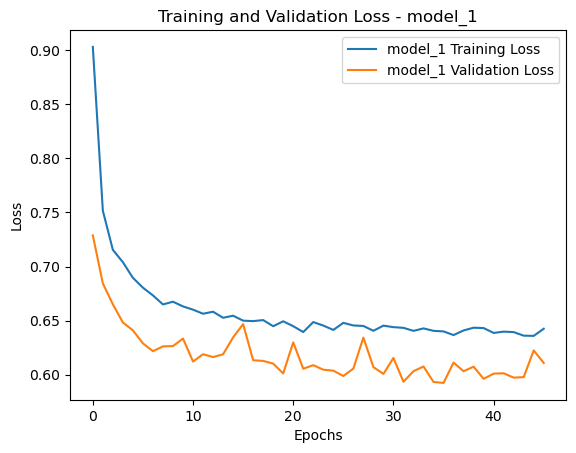

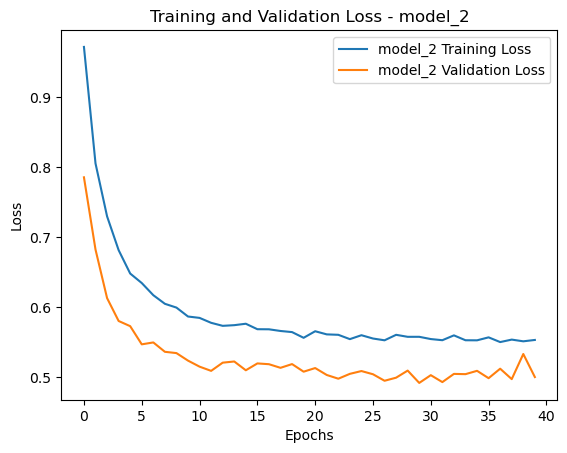

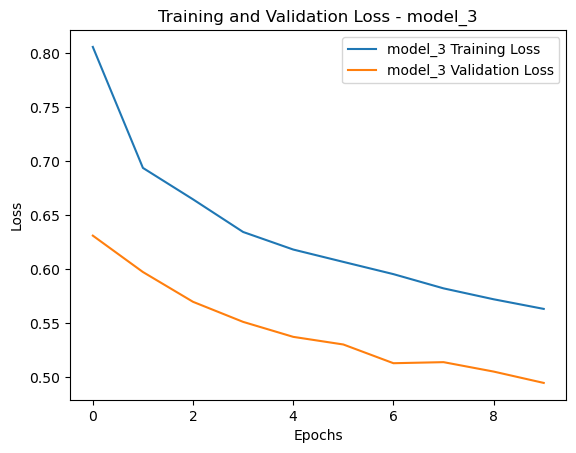

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6238 - mae: 0.6043  
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.5178 - mae: 0.5490
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.6858 - mae: 0.6051
Model 1 Test MAE: [0.6134130358695984, 0.6089125275611877]
Model 2 Test MAE: [0.49675077199935913, 0.5412936210632324]
Model 3 Test MAE: [0.657341718673706, 0.5920323133468628]


In [19]:
for model_name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - {model_name}')
    plt.legend()
    plt.show()

# Evaluate each model on the test set
mae_test_1 = model_1.evaluate(X_test_1_scaled, y_test)
mae_test_2 = model_2.evaluate(X_test_2_scaled, y_test)
mae_test_3 = model_3.evaluate(X_test_3_scaled, y_test)

print(f'Model 1 Test MAE: {mae_test_1}')
print(f'Model 2 Test MAE: {mae_test_2}')
print(f'Model 3 Test MAE: {mae_test_3}')

In [37]:
# 4.3 (h)
# done above only

In [38]:
# 4.3 (i)
y_pred_test = model.predict(X_test_scaled)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


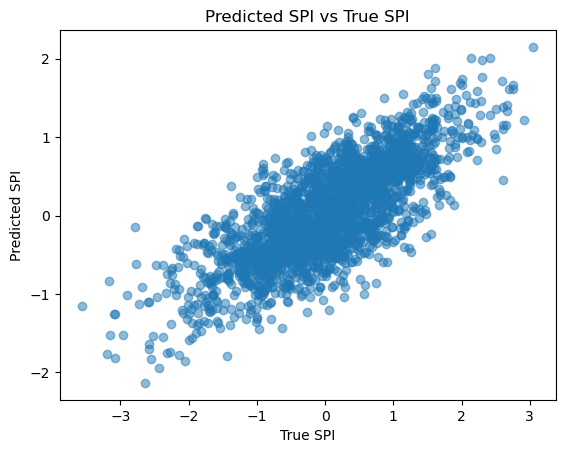

Mean Absolute Error (MAE): 0.4990
Pearson Correlation Coefficient: 0.7659


In [39]:
from sklearn.metrics import mean_absolute_error # type: ignore
from scipy.stats import pearsonr # type: ignore

# Creating a scatter plot to show predicted SPI (y-axis) vs true SPI (x-axis) as required by assignment
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('Predicted SPI vs True SPI')
plt.xlabel('True SPI')
plt.ylabel('Predicted SPI')
plt.show()

# Calculatin and printin Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

y_test_np = np.array(y_test)

# Calculating and printin the Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(y_test_np.flatten(), y_pred_test.flatten())
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")

In [40]:
# Training our model on the training set
model.fit(X_train_scaled, y_train)

y_pred_val = model.predict(X_val_scaled)
y_pred_test = model.predict(X_test_scaled)


y_val_np = np.array(y_val).flatten()
y_pred_val_np = np.array(y_pred_val).flatten()
y_test_np = np.array(y_test).flatten()
y_pred_test_np = np.array(y_pred_test).flatten()

mae_val = mean_absolute_error(y_val_np, y_pred_val_np)
corr_val, _ = pearsonr(y_val_np.flatten(), y_pred_val_np.flatten())

mae_test = mean_absolute_error(y_test_np, y_pred_test_np)
corr_test, _ = pearsonr(y_test_np.flatten(), y_pred_test_np.flatten())

print("MAE on validation set:", mae_val)
print("Pearson Correlation Coefficient on validation set:", corr_val)
print("MAE on test set:", mae_test)
print("Pearson Correlation Coefficient on test set:", corr_test)


331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.4681 - mae: 0.5334
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
MAE on validation set: 0.511021880040983
Pearson Correlation Coefficient on validation set: 0.766935918832842
MAE on test set: 0.5128405519463156
Pearson Correlation Coefficient on test set: 0.7600236863821196


MAE for our training , test and validation set is around the same , which means that our model is learning and adapting and working good even with new data 


In [41]:
model.save('regression_model.h5')

In [62]:
#5.2 (a)
data_new = pd.read_csv('Climate_SPI2.csv')

In [63]:
# 5.2 (b)
X_new = data_new.drop(columns=['year', 'grid_ID' ,'SPI'])
y_new = data_new['SPI']

In [64]:
# 5.2 (b)
X_new_scaled = scaler.transform(X_new)

In [65]:
# 5.2 (c)
model = load_model('regression_model.h5')

In [66]:
# 5.2 (d)
y_pred_new = model.predict(X_new_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step


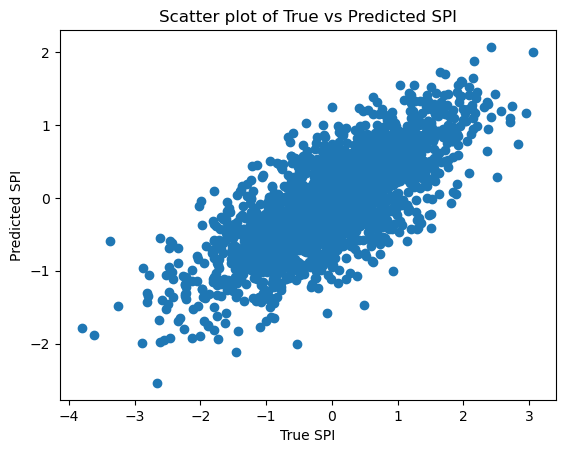

In [67]:
# 5.2 (e) 
plt.scatter(y_new, y_pred_new)
plt.xlabel('True SPI')
plt.ylabel('Predicted SPI')
plt.title('Scatter plot of True vs Predicted SPI')
plt.show()

In [68]:
mae = mean_absolute_error(y_new, y_pred_new)
pearson_corr, _ = pearsonr(y_new, y_pred_new.flatten())

In [69]:
# 5.2 (f) 
print(f"Mean Absolute Error: {mae}")
print(f"Pearson Correlation Coefficient: {pearson_corr}")


Mean Absolute Error: 0.5295675179101402
Pearson Correlation Coefficient: 0.7527461306869854


MAE and PEARSON Correlation Coefficient evaluating on fresh new data is also about the same , which verifies our model

In [61]:
# 5.2 (g) 
print(f"Number of samples in the new dataset: {X_new.shape[0]}")
print(f"Model's predictors: {list(X_new.columns)}")

Number of samples in the new dataset: 2016
Model's predictors: ['month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z']
